# Implement the KNN IRIS Image Classification based on a given set of training data samples. Read the training data from a .CSV file.

# Experiment goals

1. Learn how the modeling process works
2. Learn how scikit-learn works
3. Learn how KNN works

KNN
1. Non-Parametric
2. Instance Based
3. Small Dataset
4. No Training Phase

In [4]:
import pandas as pd
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris= pd.read_csv(url, header=None, names=col_names)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size'] = 14

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [7]:
iris['species_num']= iris.species.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

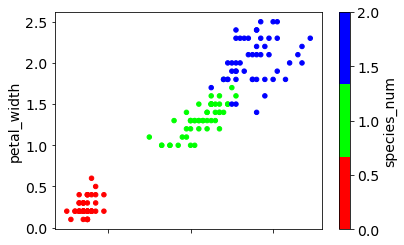

In [8]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

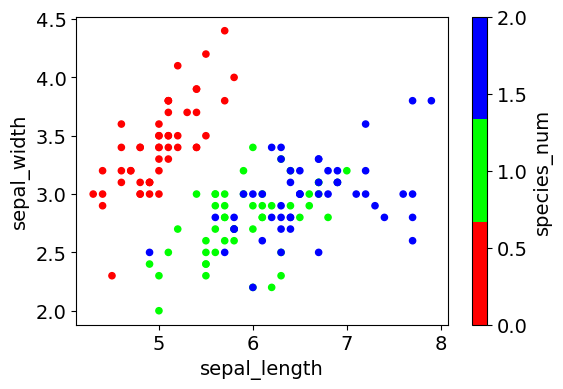

In [6]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [10]:
feature_cols= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X=iris[feature_cols]

In [11]:
X=iris.drop(['species', 'species_num'], axis=1)
X=iris.loc[:, 'sepal_length':'petal_width']
X=iris.iloc[:,0:4]

In [12]:
y= iris.species_num

In [13]:
print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [14]:
print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [15]:
print(X.shape)

(150, 4)


In [16]:
print(y.shape)

(150,)


# SciKit-Learn's 4 Step modeling Pattern

Step 1: Import the class you plan to use

In [17]:
from sklearn.neighbors import KNeighborsClassifier

Step 2: Instantiate the estimator
    
    Estimator is scikit-lear's term for model
    Instantitate means making an instance of

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)


In [19]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.predict([[3,5,4,2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [23]:
X_new = [[3,5,4,3], [5,4,3,2]]
knn.predict(X_new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn.predict(X_new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

In [26]:
knn.predict_proba(X_new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0.6, 0.4],
       [0. , 1. , 0. ]])